In [1]:
import math
import collections
import urllib.request

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
url = 'https://open.africa/dataset/25e37fa6-0e60-4153-b573-eb3bb3176aab/resource/497038cb-9fa7-434e-b4cb-d6c7364492fb/download/runoff-lake-victoria-sub-region-historic-and-projected.csv'

In [3]:
#Runoff_df = pd.read_csv(url,header=0, sep=' ')
#Runoff_df = Runoff_df[0].str.split(',', expand=True)
Runoff_df = pd.read_csv(url,error_bad_lines=False)

In [4]:
Runoff_df.head()

,Time,Jan.,Feb.,March,April,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1434.269,1447.993,2200.189,972.481,NaN,NaN,NaN
1,2001,397.920,306.293,292.853,1989.319,1755.369,412.930,403.724,237.401,194.072,231.199,2391.339,241.274,NaN,NaN,NaN
2,2002,186.679,104.908,152.357,2595.307,2399.329,433.905,343.329,630.093,236.119,186.145,258.046,149.666,NaN,NaN,NaN
3,2003,1344.156,175.964,148.024,364.632,5488.226,552.531,580.621,355.257,288.152,217.749,206.383,285.812,NaN,NaN,NaN
4,2004,114.279,107.408,145.405,536.638,4628.086,405.413,256.796,212.685,163.450,353.128,476.420,206.344,NaN,NaN,NaN


In [5]:
#Drop last three columns
Runoff_df.drop(Runoff_df.columns[[13, 14, 15]], axis=1, inplace = True)

In [6]:
Runoff_df.head(7)

,Time,Jan.,Feb.,March,April,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.
0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1434.269,1447.993,2200.189,972.481
1,2001,397.920,306.293,292.853,1989.319,1755.369,412.930,403.724,237.401,194.072,231.199,2391.339,241.274
2,2002,186.679,104.908,152.357,2595.307,2399.329,433.905,343.329,630.093,236.119,186.145,258.046,149.666
3,2003,1344.156,175.964,148.024,364.632,5488.226,552.531,580.621,355.257,288.152,217.749,206.383,285.812
4,2004,114.279,107.408,145.405,536.638,4628.086,405.413,256.796,212.685,163.450,353.128,476.420,206.344
5,2005,273.431,263.036,517.948,154.614,2845.187,612.442,312.984,275.394,175.451,152.065,117.135,94.357
6,2006,67.077,54.172,233.570,237.903,578.209,690.305,404.299,320.252,375.822,433.387,1819.608,1454.517


In [7]:
Runoff_df.columns

Index(['Time', 'Jan.', 'Feb.', 'March', 'April', 'May', 'June', 'July', 'Aug.',
       'Sept.', 'Oct.', 'Nov.', 'Dec.'],
      dtype='object')

In [8]:
Runoff_df = Runoff_df.interpolate(method="linear",limit_direction ='backward')

In [9]:
Runoff_df.head(7)

,Time,Jan.,Feb.,March,April,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.
0,2000,397.920,306.293,292.853,1989.319,1755.369,412.930,403.724,237.401,1434.269,1447.993,2200.189,972.481
1,2001,397.920,306.293,292.853,1989.319,1755.369,412.930,403.724,237.401,194.072,231.199,2391.339,241.274
2,2002,186.679,104.908,152.357,2595.307,2399.329,433.905,343.329,630.093,236.119,186.145,258.046,149.666
3,2003,1344.156,175.964,148.024,364.632,5488.226,552.531,580.621,355.257,288.152,217.749,206.383,285.812
4,2004,114.279,107.408,145.405,536.638,4628.086,405.413,256.796,212.685,163.450,353.128,476.420,206.344
5,2005,273.431,263.036,517.948,154.614,2845.187,612.442,312.984,275.394,175.451,152.065,117.135,94.357
6,2006,67.077,54.172,233.570,237.903,578.209,690.305,404.299,320.252,375.822,433.387,1819.608,1454.517


In [10]:
Runoff_df.describe()

,Time,Jan.,Feb.,March,April,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2017.500000,443.906917,252.456472,338.663861,846.655333,1547.855361,514.580694,250.420806,226.409139,277.727889,266.177028,508.044611,519.753194
std,10.535654,797.545319,631.287782,653.902880,949.982810,1750.643751,863.950346,243.488682,274.141674,358.792288,428.534794,985.377033,716.388183
min,2000.000000,0.861000,0.230000,0.386000,7.527000,2.817000,0.099000,0.078000,0.062000,0.076000,0.070000,1.006000,2.841000
25%,2008.750000,43.565250,19.058250,57.922750,143.513750,62.579500,15.181250,9.072250,4.849000,7.947000,6.809250,9.349000,64.208000
50%,2017.500000,172.039500,106.158000,148.895500,426.057500,613.472500,365.798000,261.472000,200.079500,185.823000,184.962500,185.673000,203.926500
75%,2026.250000,397.920000,231.014250,292.853000,1401.314000,2765.358500,613.367750,444.894500,347.118000,377.646250,266.212000,327.009500,657.754750
max,2035.000000,4180.696000,3789.189000,3615.210000,3310.798000,5488.226000,4596.516000,752.257000,1352.084000,1434.269000,2123.547000,4935.878000,3227.697000


In [11]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

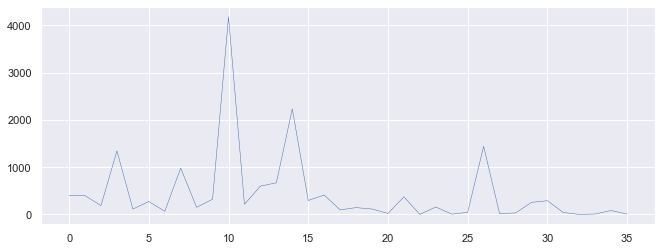

In [12]:
Runoff_df['Jan.'].plot(linewidth=0.5);

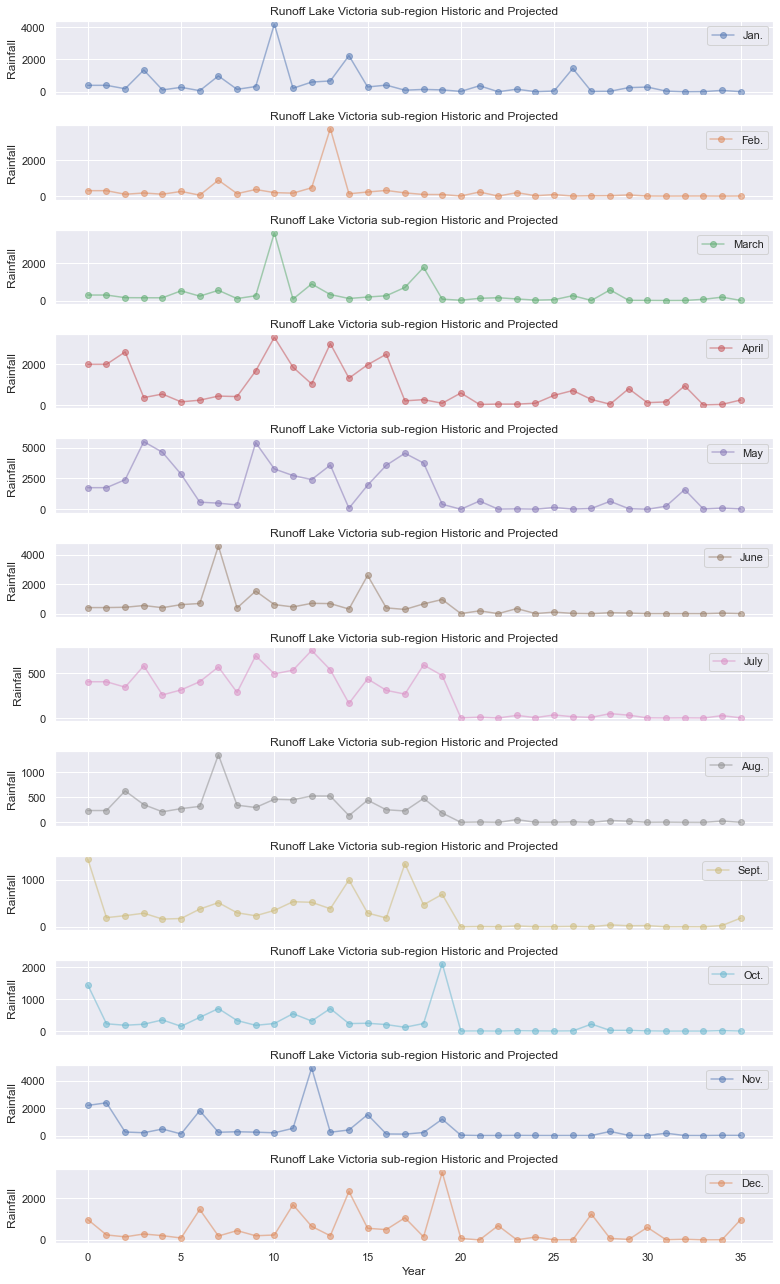

In [32]:
cols_plot = ['Jan.', 'Feb.','March','April','May','June','July', 'Aug.','Sept.', 'Oct.','Nov.','Dec.']
axes = Runoff_df[cols_plot].plot(marker='o', linestyle='-', alpha=0.5,figsize=(11, 18), subplots=True)
for ax in axes:
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall')
    ax.set_title('Runoff Lake Victoria sub-region Historic and Projected');
    
pp.tight_layout()